## Step 1: Frame the Problem

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_cr = pd.read_csv("tmdb_5000_credits.csv")
data_cr.columns = ['id', 'title', 'cast', 'crew']
data_mv = pd.read_csv("tmdb_5000_movies.csv")
data = data_mv.merge(data_cr, on='id', suffixes=['', '_y'])
print(data.shape)
data.head(n=2)

(4803, 23)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


## Step 2: Data Exploration

In [3]:
data_explore = data.copy()

In [4]:
drop_cols = ['id', 'homepage', 'spoken_languages', 'overview', 'tagline', 'title', 'title_y']
data_explore = data_explore.drop(columns=drop_cols, axis=1)
data_explore.head(n=3)

,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [5]:
data_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   keywords              4803 non-null   object 
 3   original_language     4803 non-null   object 
 4   original_title        4803 non-null   object 
 5   popularity            4803 non-null   float64
 6   production_companies  4803 non-null   object 
 7   production_countries  4803 non-null   object 
 8   release_date          4802 non-null   object 
 9   revenue               4803 non-null   int64  
 10  runtime               4801 non-null   float64
 11  status                4803 non-null   object 
 12  vote_average          4803 non-null   float64
 13  vote_count            4803 non-null   int64  
 14  cast                  4803 non-null   object 
 15  crew                 

In [6]:
data_explore['release_date'] = data_explore['release_date'].fillna('2000-01-01')
data_explore['release_year'] = pd.DatetimeIndex(data_explore['release_date']).year
data_explore['release_month'] = pd.DatetimeIndex(data_explore['release_date']).month
data_explore['release_day'] = pd.DatetimeIndex(data_explore['release_date']).day
data_explore['release_dow'] = pd.DatetimeIndex(data_explore['release_date']).dayofweek
data_explore = data_explore.drop('release_date', axis=1)

In [7]:
data_explore.head(n=3)

,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,revenue,runtime,status,vote_average,vote_count,cast,crew,release_year,release_month,release_day,release_dow
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,Released,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009,12,10,3
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,169.0,Released,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007,5,19,5
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,148.0,Released,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015,10,26,0


In [8]:
nan_cols = data_explore.isna().sum()
nan_cols[nan_cols>0]

runtime    2
dtype: int64

In [9]:
data_explore['runtime'] = data_explore['runtime'].fillna(data_explore['runtime'].median()) 

In [10]:
data_explore.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month,release_day,release_dow
count,4.803000e+03,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.874245,6.092172,690.217989,2002.468249,6.794712,15.176556,3.204872
std,4.072239e+07,31.816650,1.628571e+08,22.607364,1.194612,1234.585891,12.413112,3.424852,8.647118,1.373001
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1916.000000,1.000000,1.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000,1999.000000,4.000000,8.000000,2.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000,2005.000000,7.000000,15.000000,4.000000
75%,4.000000e+07,28.313505,9.291719e+07,117.500000,6.800000,737.000000,2011.000000,10.000000,22.000000,4.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000,12.000000,31.000000,6.000000


- Min budget, runtime, revenue is zero. For prediction of revenue, we cannot have records of movies for which revenue is zero, so we have to remove those records from training data.

In [11]:
sum(data_explore['revenue']==0)

1427

In [12]:
data_explore = data_explore[data_explore['revenue']!=0]
data_explore.shape

(3376, 19)

In [13]:
import ast
dict_cols = ['genres', 'production_companies', 'production_countries', 'keywords', 'cast', 'crew']

for col in dict_cols:
    data_explore[col] = data_explore[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [14]:
def get_names(x, col):
    """
        Get the name field from each JSON object.
        For crew field, considering the Director only.
        For cast field, considering the first 3 cast members. Generally they are the main roles from movie.
    """
    names = []
    for item in x:
        if col=='crew':
            if item['job']=='Director':
                names.append(item['name'])
        elif col=='cast':
            if item['order'] in (0, 1, 2):
                names.append(item['name'])
        else:
            names.append(item['name'])
    return names
    
for col in dict_cols:
    data_explore[col] = data_explore[col].apply(lambda x: get_names(x, col))

In [15]:
data_explore.head(n=3)

,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,revenue,runtime,status,vote_average,vote_count,cast,crew,release_year,release_month,release_day,release_dow
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,Avatar,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2787965087,162.0,Released,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],2009,12,10,3
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],961000000,169.0,Released,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],2007,5,19,5
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",en,Spectre,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",880674609,148.0,Released,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],2015,10,26,0


In [16]:
# Select only numeric columns
numeric_data = data_explore.select_dtypes(include=['number'])

# Calculate the Q1 and Q3 values for numeric data
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Identify outliers based on the IQR
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()

# Display columns with outliers
outliers[outliers > 0]


budget          234
popularity      182
revenue         299
runtime         103
vote_average     50
vote_count      322
release_year    206
dtype: int64

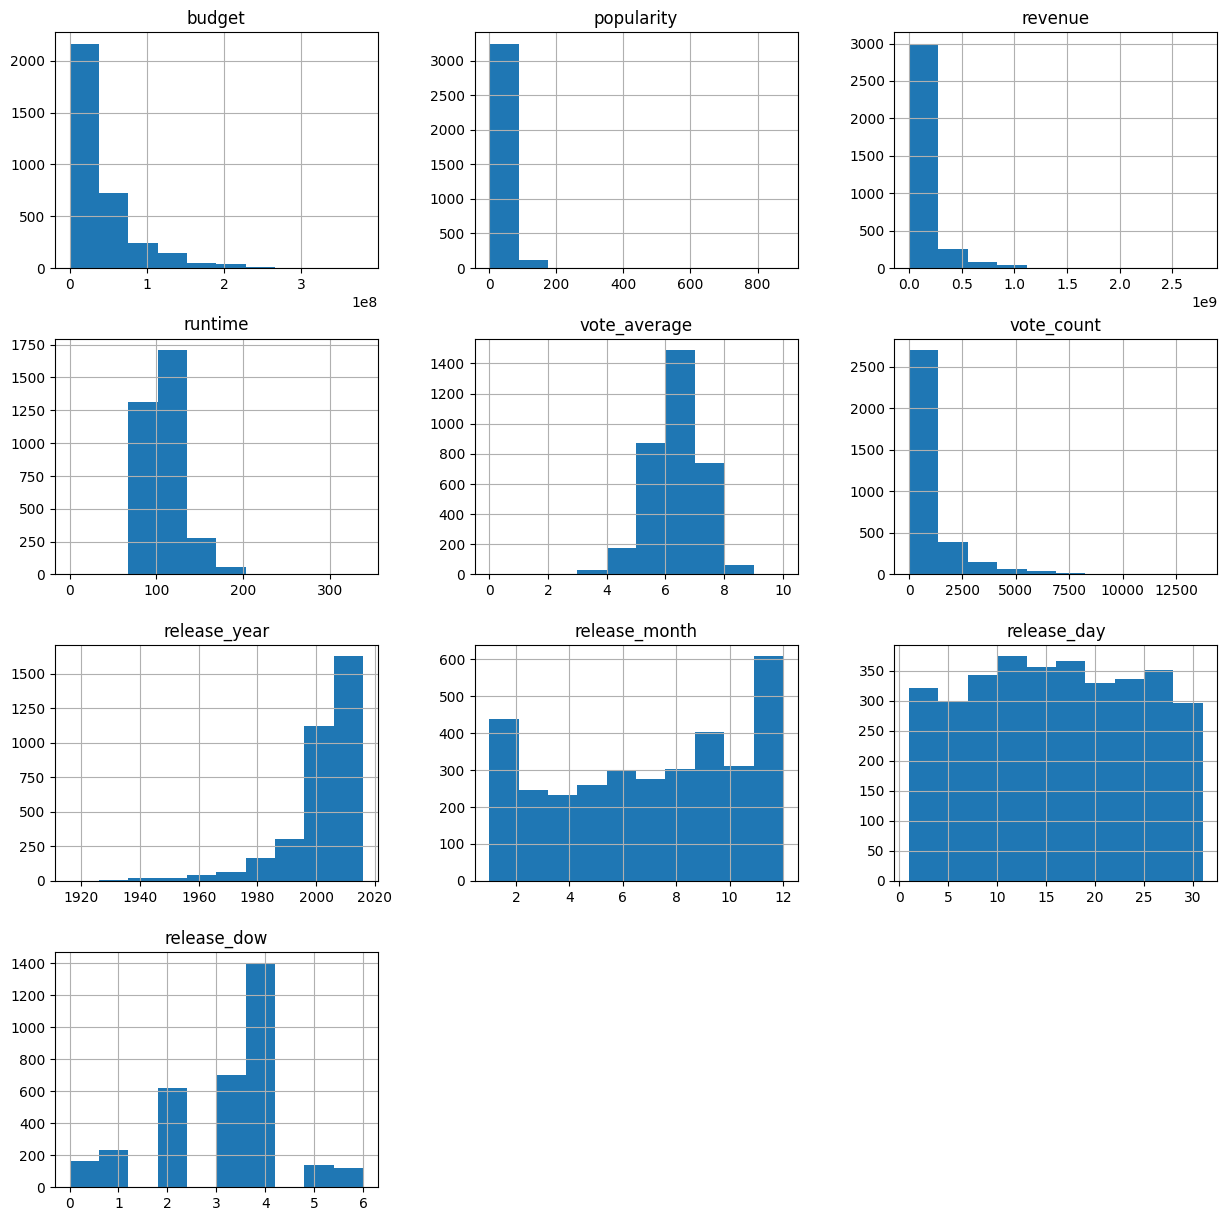

In [17]:
data_explore.hist(figsize=(15, 15))
plt.show()

### Top 20 Most Popular Movies

In [18]:
most_popular_movies = data_explore.sort_values('popularity', ascending=False).head(n=20)
most_popular_movies['revenue(million)'] = most_popular_movies['revenue'].apply(lambda x : x//1000000)    # revenue in millions
most_popular_movies['budget(million)'] = most_popular_movies['budget'].apply(lambda x : x//1000000)    # revenue in millions
most_popular_movies[['genres', 'original_title', 'production_companies', 'popularity', 'cast', 'crew', 'vote_average', 'budget(million)', 'revenue(million)']]

,genres,original_title,production_companies,popularity,cast,crew,vote_average,budget(million),revenue(million)
546,"[Family, Animation, Adventure, Comedy]",Minions,"[Universal Pictures, Illumination Entertainment]",875.581305,"[Sandra Bullock, Jon Hamm, Michael Keaton]","[Kyle Balda, Pierre Coffin]",6.4,74,1156
95,"[Adventure, Drama, Science Fiction]",Interstellar,"[Paramount Pictures, Legendary Pictures, Warne...",724.247784,"[Matthew McConaughey, Jessica Chastain, Anne H...",[Christopher Nolan],8.1,165,675
788,"[Action, Adventure, Comedy]",Deadpool,"[Twentieth Century Fox Film Corporation, Marve...",514.569956,"[Ryan Reynolds, Morena Baccarin, Ed Skrein]",[Tim Miller],7.4,58,783
94,"[Action, Science Fiction, Adventure]",Guardians of the Galaxy,"[Marvel Studios, Moving Picture Company (MPC),...",481.098624,"[Chris Pratt, Zoe Saldana, Dave Bautista]",[James Gunn],7.9,170,773
127,"[Action, Adventure, Science Fiction, Thriller]",Mad Max: Fury Road,"[Village Roadshow Pictures, Kennedy Miller Pro...",434.278564,"[Tom Hardy, Charlize Theron, Nicholas Hoult]",[George Miller],7.2,150,378
28,"[Action, Adventure, Science Fiction, Thriller]",Jurassic World,"[Universal Studios, Amblin Entertainment, Lege...",418.708552,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan]",[Colin Trevorrow],6.5,150,1513
199,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: The Curse of the Bla...,"[Walt Disney Pictures, Jerry Bruckheimer Films]",271.972889,"[Johnny Depp, Geoffrey Rush, Orlando Bloom]",[Gore Verbinski],7.5,140,655
82,"[Science Fiction, Action, Drama, Thriller]",Dawn of the Planet of the Apes,"[Ingenious Media, Chernin Entertainment, TSG E...",243.791743,"[Andy Serkis, Jason Clarke, Gary Oldman]",[Matt Reeves],7.3,170,710
200,"[Science Fiction, Adventure, Thriller]",The Hunger Games: Mockingjay - Part 1,"[Lionsgate, Color Force]",206.227151,"[Jennifer Lawrence, Josh Hutcherson, Liam Hems...",[Francis Lawrence],6.6,125,752
88,"[Adventure, Family, Animation, Action, Comedy]",Big Hero 6,"[Walt Disney Pictures, Walt Disney Animation S...",203.734590,"[Scott Adsit, Ryan Potter, Daniel Henney]","[Chris Williams, Don Hall]",7.8,165,652


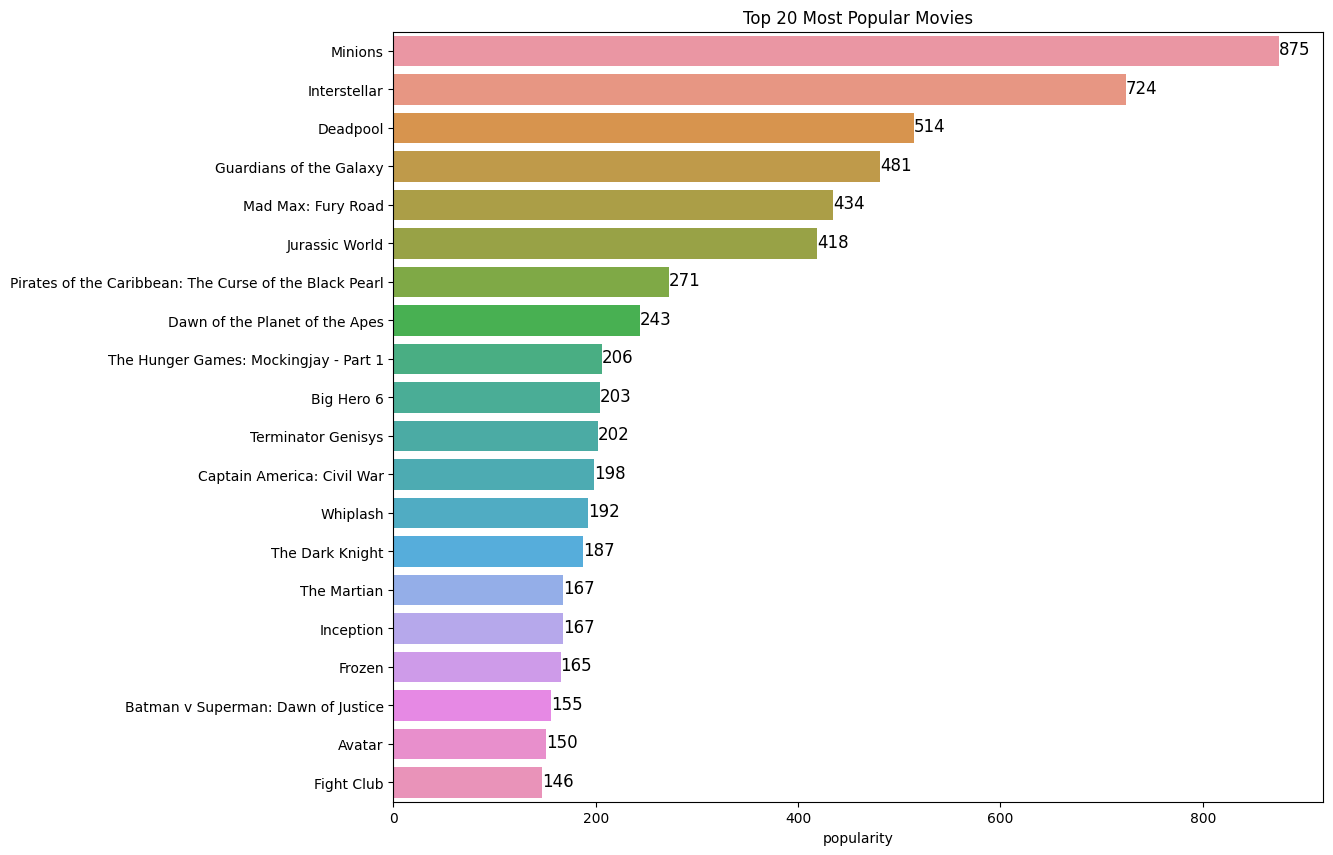

In [19]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='popularity', data=most_popular_movies, order=most_popular_movies.sort_values('popularity', ascending=False).original_title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 20 Most Popular Movies', fontsize=12)
plt.ylabel('')
plt.show()

### Top 20 Highest Earned Movies

In [20]:
highest_revenue_movies = data_explore.sort_values('revenue', ascending=False).head(n=20)
highest_revenue_movies['revenue(million)'] = highest_revenue_movies['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_revenue_movies['budget(million)'] = highest_revenue_movies['budget'].apply(lambda x : x//1000000)    # revenue in millions
highest_revenue_movies[['genres', 'original_title', 'production_companies', 'popularity', 'cast', 'crew', 'vote_average', 'budget(million)', 'revenue(million)']]

,genres,original_title,production_companies,popularity,cast,crew,vote_average,budget(million),revenue(million)
0,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,"[Ingenious Film Partners, Twentieth Century Fo...",150.437577,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],7.2,237,2787
25,"[Drama, Romance, Thriller]",Titanic,"[Paramount Pictures, Twentieth Century Fox Fil...",100.025899,"[Kate Winslet, Leonardo DiCaprio, Frances Fisher]",[James Cameron],7.5,200,1845
16,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",144.448633,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],7.4,220,1519
28,"[Action, Adventure, Science Fiction, Thriller]",Jurassic World,"[Universal Studios, Amblin Entertainment, Lege...",418.708552,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan]",[Colin Trevorrow],6.5,150,1513
44,[Action],Furious 7,"[Universal Pictures, Original Film, Fuji Telev...",102.322217,"[Vin Diesel, Paul Walker, Dwayne Johnson]",[James Wan],7.3,190,1506
7,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",134.279229,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],7.3,280,1405
124,"[Animation, Adventure, Family]",Frozen,"[Walt Disney Pictures, Walt Disney Animation S...",165.125366,"[Kristen Bell, Idina Menzel, Jonathan Groff]","[Chris Buck, Jennifer Lee]",7.3,150,1274
31,"[Action, Adventure, Science Fiction]",Iron Man 3,[Marvel Studios],77.682080,"[Robert Downey Jr., Gwyneth Paltrow, Don Cheadle]",[Shane Black],6.8,200,1215
546,"[Family, Animation, Adventure, Comedy]",Minions,"[Universal Pictures, Illumination Entertainment]",875.581305,"[Sandra Bullock, Jon Hamm, Michael Keaton]","[Kyle Balda, Pierre Coffin]",6.4,74,1156
26,"[Adventure, Action, Science Fiction]",Captain America: Civil War,"[Studio Babelsberg, Marvel Studios, Walt Disne...",198.372395,"[Chris Evans, Robert Downey Jr., Scarlett Joha...","[Anthony Russo, Joe Russo]",7.1,250,1153


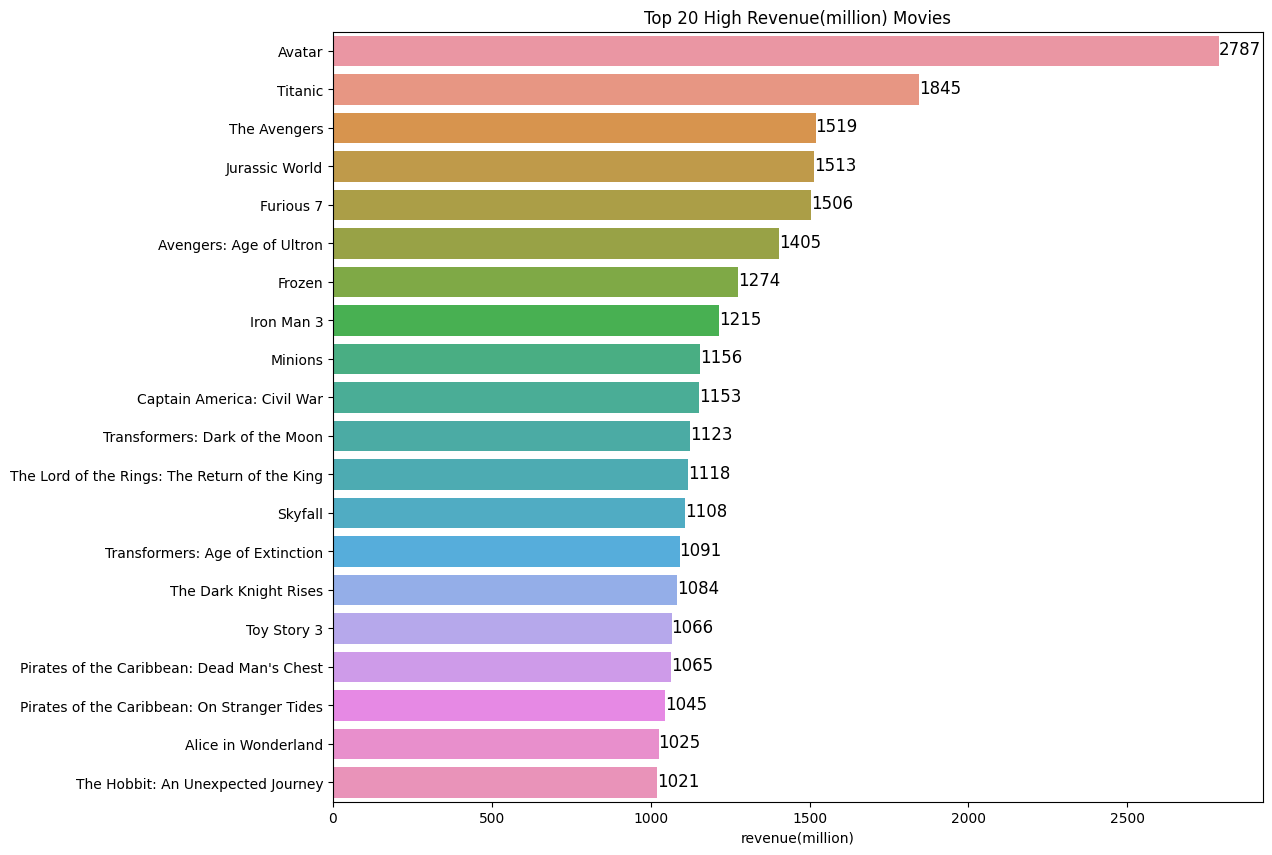

In [21]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='revenue(million)', data=highest_revenue_movies, order=highest_revenue_movies.sort_values('revenue(million)', ascending=False).original_title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 20 High Revenue(million) Movies', fontsize=12)
plt.ylabel('')
plt.show()

### Top 20 High Budget Movies

In [22]:
highest_budget_movies = data_explore.sort_values('budget', ascending=False).head(n=20)
highest_budget_movies['revenue(million)'] = highest_budget_movies['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_budget_movies['budget(million)'] = highest_budget_movies['budget'].apply(lambda x : x//1000000)    # revenue in millions
highest_budget_movies[['genres', 'original_title', 'production_companies', 'popularity', 'cast', 'crew', 'vote_average', 'budget(million)', 'revenue(million)']]

,genres,original_title,production_companies,popularity,cast,crew,vote_average,budget(million),revenue(million)
17,"[Adventure, Action, Fantasy]",Pirates of the Caribbean: On Stranger Tides,"[Walt Disney Pictures, Jerry Bruckheimer Films...",135.413856,"[Johnny Depp, Penélope Cruz, Ian McShane]",[Rob Marshall],6.4,380,1045
1,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,"[Walt Disney Pictures, Jerry Bruckheimer Films...",139.082615,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],6.9,300,961
7,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",134.279229,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],7.3,280,1405
10,"[Adventure, Fantasy, Action, Science Fiction]",Superman Returns,"[DC Comics, Legendary Pictures, Warner Bros., ...",57.925623,"[Brandon Routh, Kevin Spacey, Kate Bosworth]",[Bryan Singer],5.4,270,391
4,"[Action, Adventure, Science Fiction]",John Carter,[Walt Disney Pictures],43.926995,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],6.1,260,284
6,"[Animation, Family]",Tangled,"[Walt Disney Pictures, Walt Disney Animation S...",48.681969,"[Zachary Levi, Mandy Moore, Donna Murphy]","[Byron Howard, Nathan Greno]",7.4,260,591
5,"[Fantasy, Action, Adventure]",Spider-Man 3,"[Columbia Pictures, Laura Ziskin Productions, ...",115.699814,"[Tobey Maguire, Kirsten Dunst, James Franco]",[Sam Raimi],5.9,258,890
13,"[Action, Adventure, Western]",The Lone Ranger,"[Walt Disney Pictures, Jerry Bruckheimer Films...",49.046956,"[Johnny Depp, Armie Hammer, William Fichtner]",[Gore Verbinski],5.9,255,89
98,"[Adventure, Fantasy, Action]",The Hobbit: An Unexpected Journey,"[WingNut Films, New Line Cinema, Warner Bros. ...",108.849621,"[Ian McKellen, Martin Freeman, Richard Armitage]",[Peter Jackson],7.0,250,1021
26,"[Adventure, Action, Science Fiction]",Captain America: Civil War,"[Studio Babelsberg, Marvel Studios, Walt Disne...",198.372395,"[Chris Evans, Robert Downey Jr., Scarlett Joha...","[Anthony Russo, Joe Russo]",7.1,250,1153


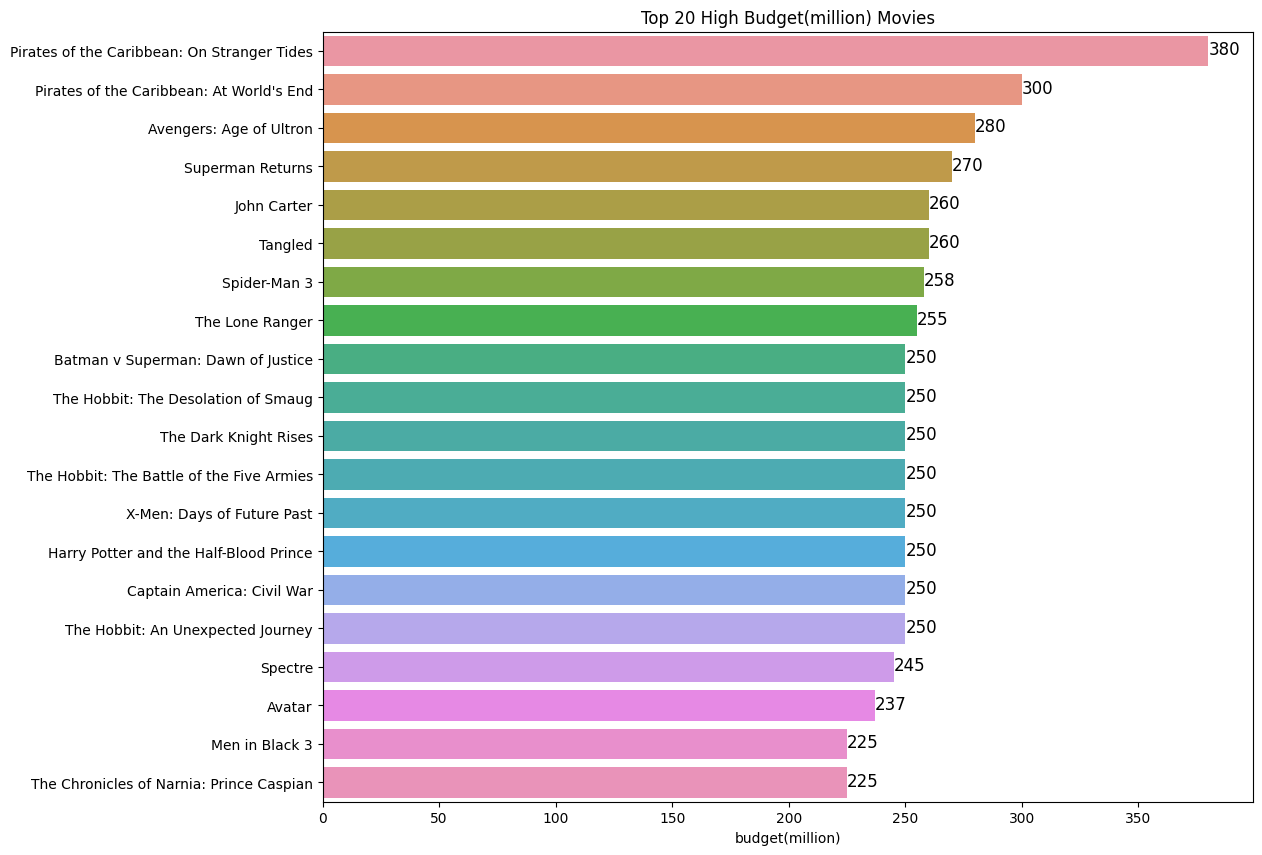

In [23]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='budget(million)', data=highest_budget_movies, order=highest_budget_movies.sort_values('budget(million)', ascending=False).original_title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 20 High Budget(million) Movies', fontsize=12)
plt.ylabel('')
plt.show()

### Top 20 Highest Grossing Movies

In [24]:
most_profit_movies = data_explore.copy()
most_profit_movies['revenue(million)'] = most_profit_movies['revenue'].apply(lambda x : x//1000000)    # revenue in millions
most_profit_movies['budget(million)'] = most_profit_movies['budget'].apply(lambda x : x//1000000)    # revenue in millions
most_profit_movies['profit(million)'] = most_profit_movies['revenue(million)']-most_profit_movies['budget(million)']
most_profit_movies = most_profit_movies.sort_values('profit(million)', ascending=False).head(n=20)
most_profit_movies[['genres', 'original_title', 'production_companies', 'popularity', 'cast', 'crew', 'vote_average', 'budget(million)', 'revenue(million)', 'profit(million)']]

,genres,original_title,production_companies,popularity,cast,crew,vote_average,budget(million),revenue(million),profit(million)
0,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,"[Ingenious Film Partners, Twentieth Century Fo...",150.437577,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],7.2,237,2787,2550
25,"[Drama, Romance, Thriller]",Titanic,"[Paramount Pictures, Twentieth Century Fox Fil...",100.025899,"[Kate Winslet, Leonardo DiCaprio, Frances Fisher]",[James Cameron],7.5,200,1845,1645
28,"[Action, Adventure, Science Fiction, Thriller]",Jurassic World,"[Universal Studios, Amblin Entertainment, Lege...",418.708552,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan]",[Colin Trevorrow],6.5,150,1513,1363
44,[Action],Furious 7,"[Universal Pictures, Original Film, Fuji Telev...",102.322217,"[Vin Diesel, Paul Walker, Dwayne Johnson]",[James Wan],7.3,190,1506,1316
16,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",144.448633,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],7.4,220,1519,1299
7,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",134.279229,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],7.3,280,1405,1125
124,"[Animation, Adventure, Family]",Frozen,"[Walt Disney Pictures, Walt Disney Animation S...",165.125366,"[Kristen Bell, Idina Menzel, Jonathan Groff]","[Chris Buck, Jennifer Lee]",7.3,150,1274,1124
546,"[Family, Animation, Adventure, Comedy]",Minions,"[Universal Pictures, Illumination Entertainment]",875.581305,"[Sandra Bullock, Jon Hamm, Michael Keaton]","[Kyle Balda, Pierre Coffin]",6.4,74,1156,1082
329,"[Adventure, Fantasy, Action]",The Lord of the Rings: The Return of the King,"[WingNut Films, New Line Cinema]",123.630332,"[Elijah Wood, Ian McKellen, Viggo Mortensen]",[Peter Jackson],8.1,94,1118,1024
31,"[Action, Adventure, Science Fiction]",Iron Man 3,[Marvel Studios],77.682080,"[Robert Downey Jr., Gwyneth Paltrow, Don Cheadle]",[Shane Black],6.8,200,1215,1015


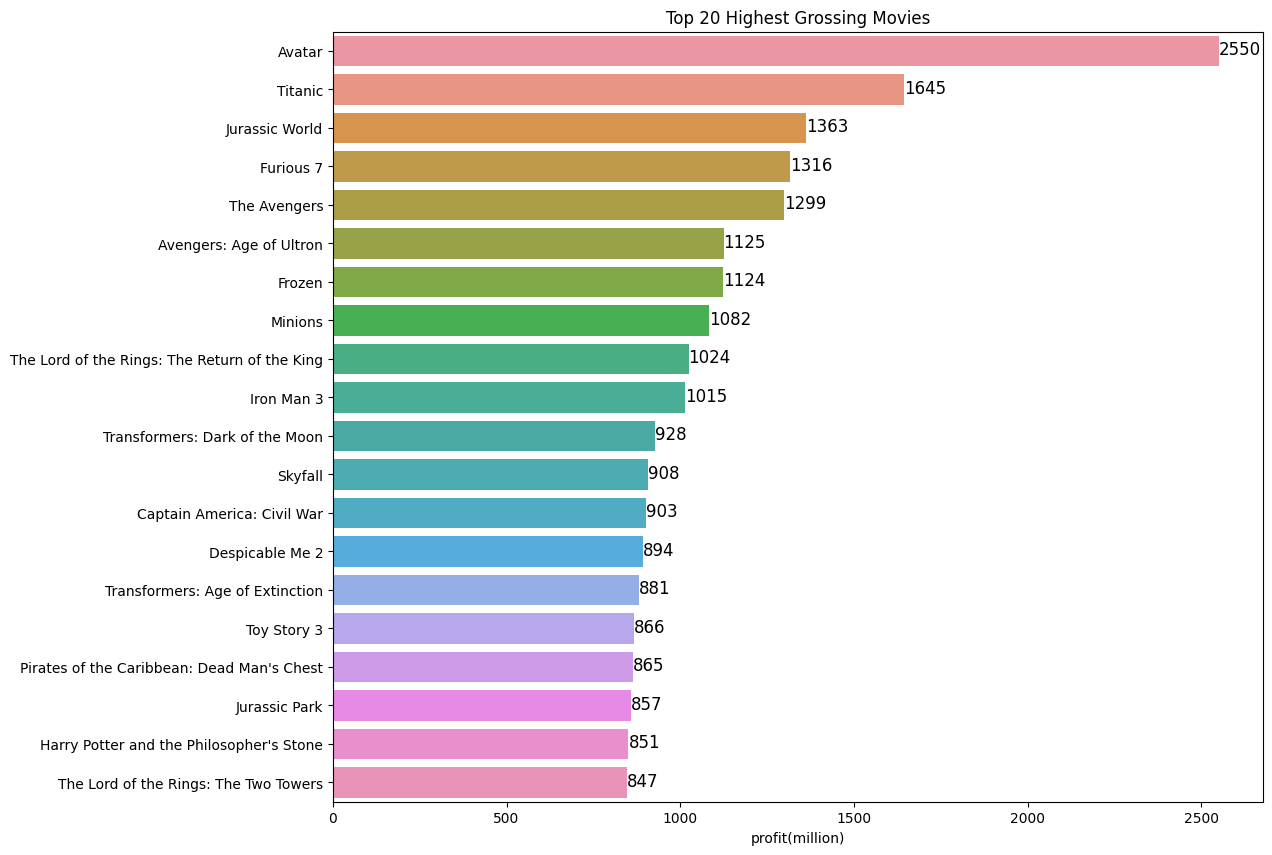

In [25]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='profit(million)', data=most_profit_movies, order=most_profit_movies.sort_values('profit(million)', ascending=False).original_title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 20 Highest Grossing Movies', fontsize=12)
plt.ylabel('')
plt.show()

### Top 20 Highest Rated Movies

In [26]:
highest_rated_movies = data_explore.copy()
highest_rated_movies['revenue(million)'] = highest_rated_movies['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_rated_movies['budget(million)'] = highest_rated_movies['budget'].apply(lambda x : x//1000000)    # revenue in millions
highest_rated_movies = highest_rated_movies.sort_values('vote_average', ascending=False).head(n=20)
highest_rated_movies[['genres', 'original_title', 'production_companies', 'popularity', 'cast', 'crew', 'vote_average', 'budget(million)', 'revenue(million)']]

,genres,original_title,production_companies,popularity,cast,crew,vote_average,budget(million),revenue(million)
4045,"[Comedy, Drama, Family]","Dancer, Texas Pop. 81","[HSX Films, Chase Productions]",0.376662,"[Breckin Meyer, Peter Facinelli, Eddie Mills]",[Tim McCanlies],10.0,0,0
2970,"[Drama, Comedy]",There Goes My Baby,[Nelson Entertainment],0.037073,"[Dermot Mulroney, Ricky Schroder, Kelli Williams]",[Floyd Mutrux],8.5,10,0
1881,"[Drama, Crime]",The Shawshank Redemption,[Castle Rock Entertainment],136.747729,"[Tim Robbins, Morgan Freeman, Bob Gunton]",[Frank Darabont],8.5,25,28
3337,"[Drama, Crime]",The Godfather,"[Paramount Pictures, Alfran Productions]",143.659698,"[Marlon Brando, Al Pacino, James Caan]",[Francis Ford Coppola],8.4,6,245
1818,"[Drama, History, War]",Schindler's List,"[Universal Pictures, Amblin Entertainment]",104.469351,"[Liam Neeson, Ben Kingsley, Ralph Fiennes]",[Steven Spielberg],8.3,22,321
2731,"[Drama, Crime]",The Godfather: Part II,"[Paramount Pictures, The Coppola Company]",105.792936,"[Al Pacino, Robert Duvall, Diane Keaton]",[Francis Ford Coppola],8.3,13,47
3865,[Drama],Whiplash,"[Bold Films, Blumhouse Productions, Right of W...",192.528841,"[Miles Teller, J.K. Simmons, Melissa Benoist]",[Damien Chazelle],8.3,3,13
662,[Drama],Fight Club,"[Regency Enterprises, Fox 2000 Pictures, Tauru...",146.757391,"[Edward Norton, Brad Pitt, Meat Loaf]",[David Fincher],8.3,63,100
2294,"[Fantasy, Adventure, Animation, Family]",千と千尋の神隠し,[Studio Ghibli],118.968562,"[Rumi Hiiragi, Miyu Irino, Mari Natsuki]",[Hayao Miyazaki],8.3,15,274
3232,"[Thriller, Crime]",Pulp Fiction,"[Miramax Films, A Band Apart, Jersey Films]",121.463076,"[John Travolta, Samuel L. Jackson, Uma Thurman]",[Quentin Tarantino],8.3,8,213


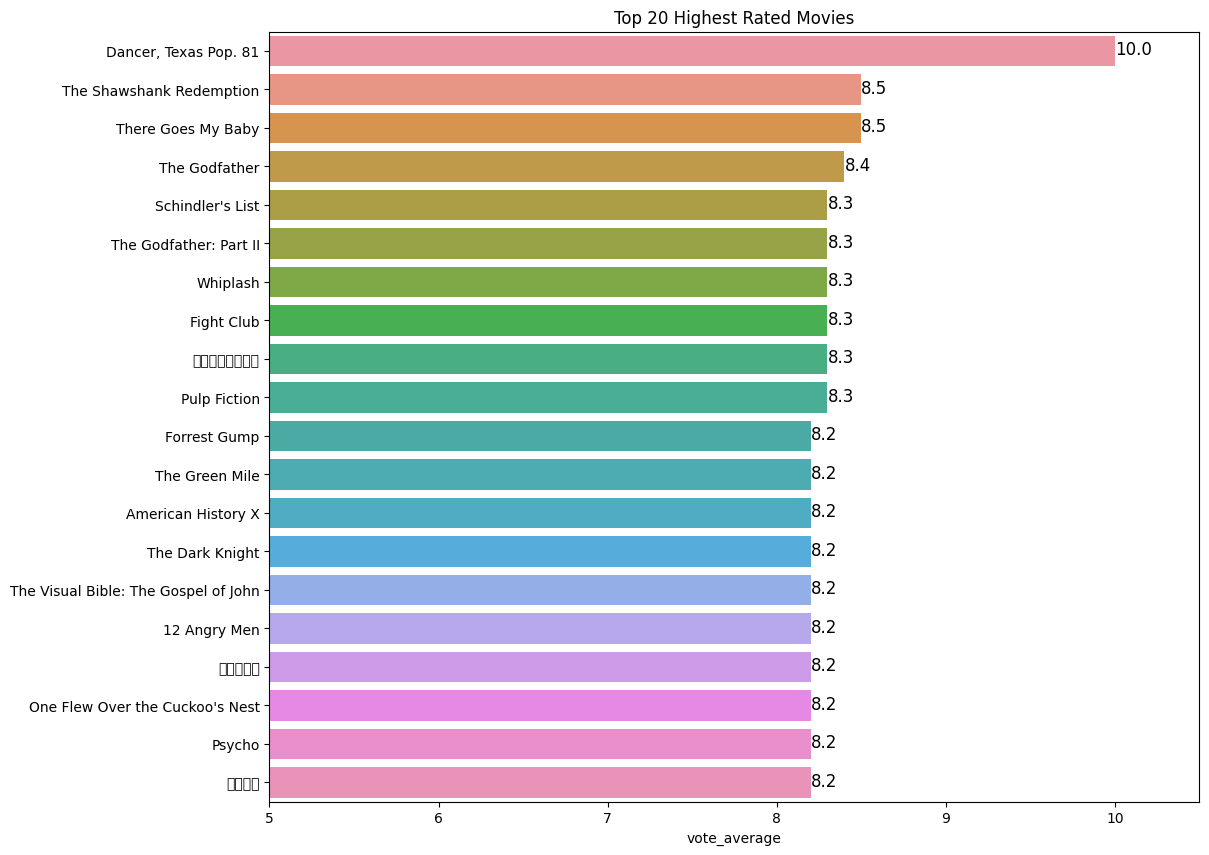

In [27]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='vote_average', data=highest_rated_movies, order=highest_rated_movies.sort_values('vote_average', ascending=False).original_title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_width()), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 20 Highest Rated Movies', fontsize=12)
plt.ylabel('')
plt.xlim(left=5)
plt.show()

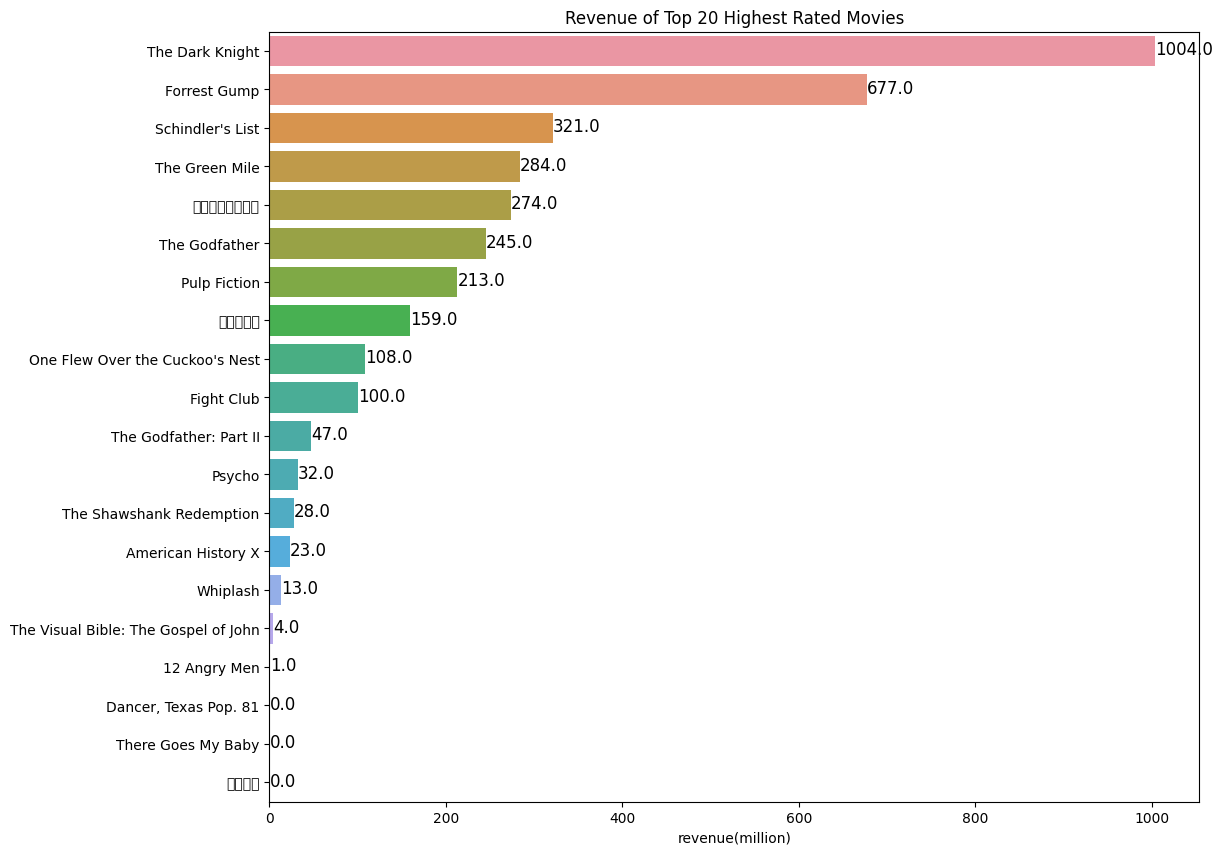

In [28]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='revenue(million)', data=highest_rated_movies, order=highest_rated_movies.sort_values('revenue(million)', ascending=False).original_title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_width()), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Revenue of Top 20 Highest Rated Movies', fontsize=12)
plt.ylabel('')
plt.show()

### Genres

In [29]:
data_explore_enc = data_explore['genres'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')
data_explore_genres = pd.concat([data_explore, data_explore_enc], axis=1)
genres = data_explore_enc.columns
data_explore_genres.head(n=3)

,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,revenue,runtime,status,vote_average,vote_count,cast,crew,release_year,release_month,release_day,release_dow,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,Avatar,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2787965087,162.0,Released,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],2009,12,10,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],961000000,169.0,Released,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],2007,5,19,5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",en,Spectre,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",880674609,148.0,Released,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],2015,10,26,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
genres_info = []
for col in genres:
    total_movies, total_budget, median_budget, total_revenue, median_revenue, median_popularity=0, 0, 0, 0, 0, 0
    total_movies = data_explore_genres[data_explore_genres[col]==1][col].count()
    total_budget = data_explore_genres[data_explore_genres[col]==1]['budget'].sum()
    median_budget = data_explore_genres[data_explore_genres[col]==1]['budget'].median()
    total_revenue = data_explore_genres[data_explore_genres[col]==1]['revenue'].sum()
    median_revenue = data_explore_genres[data_explore_genres[col]==1]['revenue'].median()
    median_popularity = data_explore_genres[data_explore_genres[col]==1]['popularity'].median()
    genres_info.append([col, total_movies, total_budget, median_budget, total_revenue, median_revenue, median_popularity])

In [31]:
genres_info = pd.DataFrame(genres_info, columns=['genres', 'movies_count', 'total_budget', 'median_budget', 'total_revenue', 'median_revenue', 'median_popularity'])
genres_info['total_budget(million)'] = genres_info['total_budget'].apply(lambda x : x//1000000)    # budget in millions
genres_info['median_budget(million)'] = genres_info['median_budget'].apply(lambda x : x//1000000)    # budget in millions
genres_info['total_revenue(million)'] = genres_info['total_revenue'].apply(lambda x : x//1000000)    # revenue in millions
genres_info['median_revenue(million)'] = genres_info['median_revenue'].apply(lambda x : x//1000000)    # revenue in millions
genres_info[['genres', 'movies_count', 'total_budget(million)', 'median_budget(million)', 'total_revenue(million)', 'median_revenue(million)', 'median_popularity']]

,genres,movies_count,total_budget(million),median_budget(million),total_revenue(million),median_revenue(million),median_popularity
0,Action,940,57274,45.0,162959,85.0,25.889910
1,Adventure,675,50825,60.0,164841,127.0,30.465138
2,Fantasy,351,25869,57.0,81982,122.0,34.366450
3,Science Fiction,439,27072,40.0,81564,78.0,27.934978
4,Crime,537,18107,25.0,46040,44.0,20.544999
5,Drama,1527,43265,19.0,119710,35.0,17.363739
6,Thriller,959,38291,28.0,103250,57.0,22.991269
7,Animation,191,15195,75.0,52812,192.0,36.654220
8,Family,382,24908,50.0,83283,119.0,23.680915
9,Western,61,2022,15.0,3792,14.0,14.970654


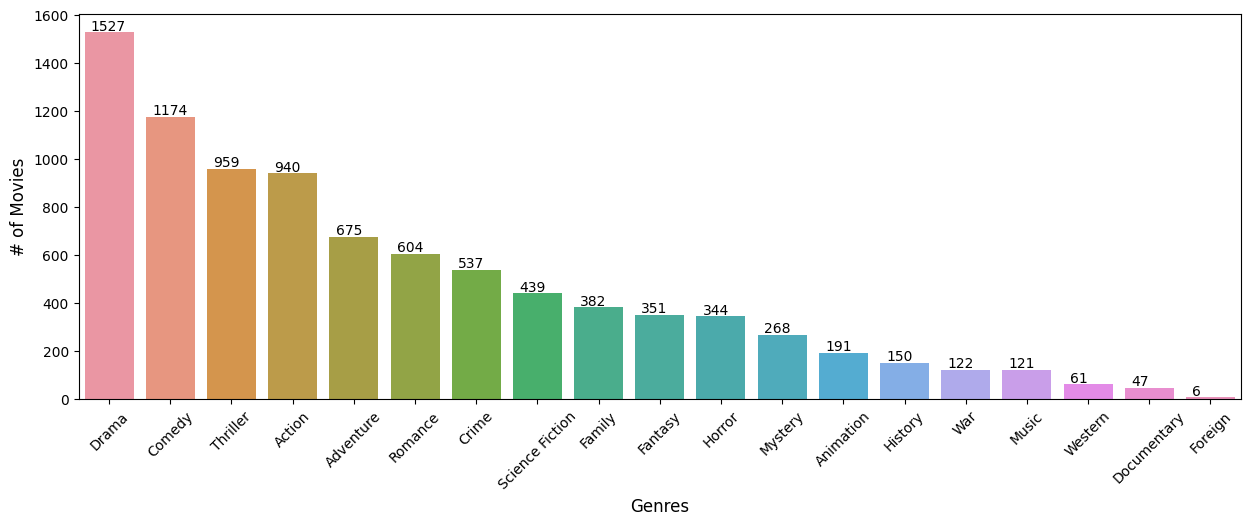

In [32]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='genres', y='movies_count', data=genres_info, order=genres_info.sort_values('movies_count', ascending=False).genres)
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_height())), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation=45)
plt.ylabel('# of Movies', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()

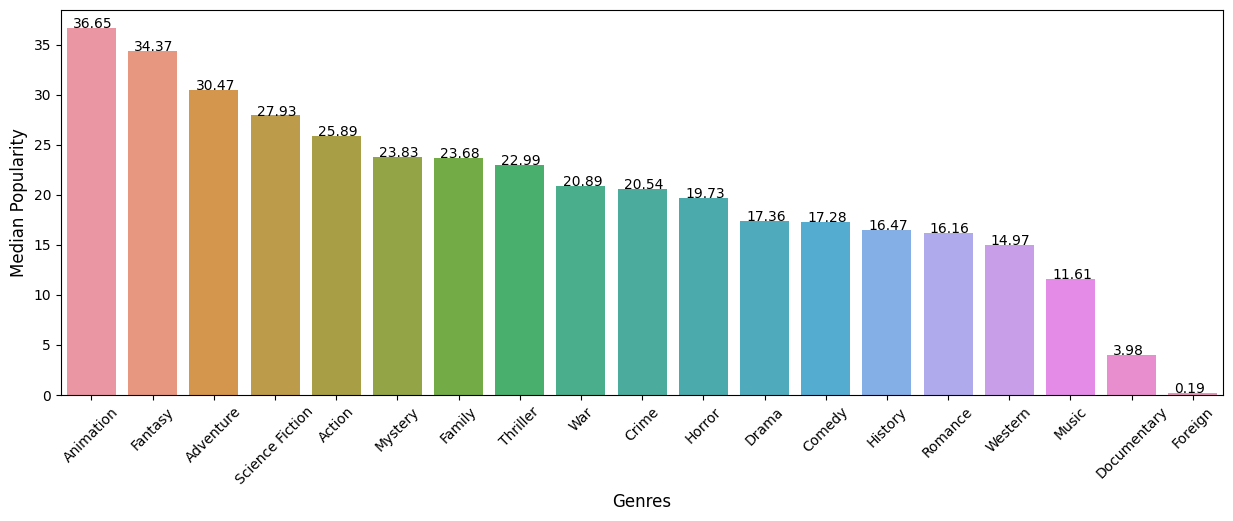

In [33]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='genres', y='median_popularity', data=genres_info, order=genres_info.sort_values('median_popularity', ascending=False).genres)
for p in ax.patches:
        ax.annotate('{}'.format(np.round(p.get_height(), 2)), (p.get_x()+0.1, p.get_height()))
plt.xticks(rotation=45)
plt.ylabel('Median Popularity', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()

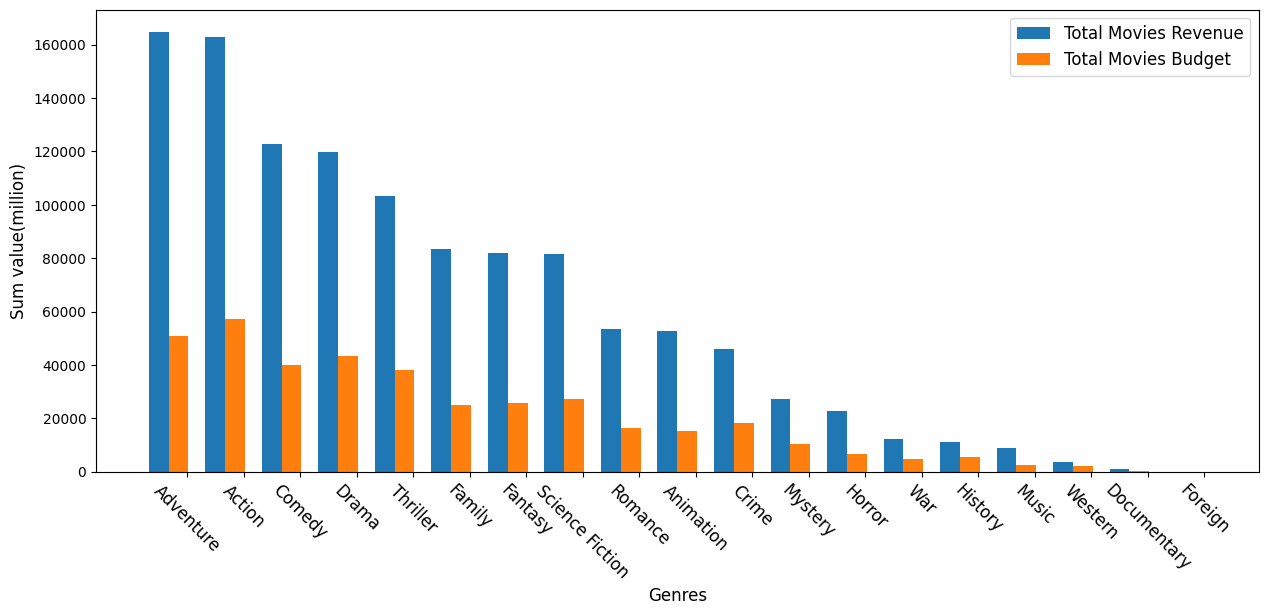

In [34]:
plt.figure(figsize=(15, 6))
x_indexes = np.arange(len(genres))     
width = 0.35                            
genres_info = genres_info.sort_values('total_revenue(million)', ascending=False)
plt.bar(x_indexes,  genres_info['total_revenue(million)'], label="Total Movies Revenue", width=width)
plt.bar(x_indexes + width,  genres_info['total_budget(million)'], label="Total Movies Budget", width=width)
plt.legend(loc="upper right", fontsize=12)
plt.xticks(ticks=x_indexes+0.5, labels=genres_info['genres'].values, fontsize=12, rotation=-45)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Sum value(million)', fontsize=12)
plt.show()

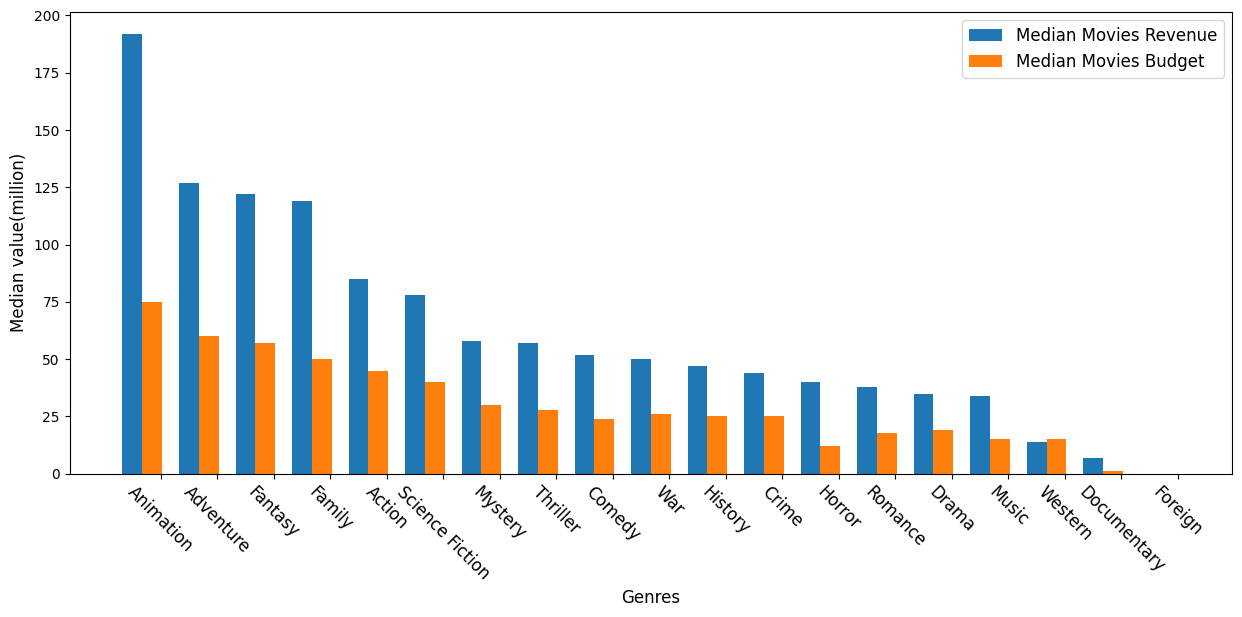

In [35]:
plt.figure(figsize=(15, 6))
x_indexes = np.arange(len(genres))     
width = 0.35                            
genres_info = genres_info.sort_values('median_revenue(million)', ascending=False)
plt.bar(x_indexes,  genres_info['median_revenue(million)'], label="Median Movies Revenue", width=width)
plt.bar(x_indexes + width,  genres_info['median_budget(million)'], label="Median Movies Budget", width=width)
plt.legend(loc="upper right", fontsize=12)
plt.xticks(ticks=x_indexes+0.5, labels=genres_info['genres'].values, fontsize=12, rotation=-45)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Median value(million)', fontsize=12)
plt.show()

### Wordclouds

In [36]:
from wordcloud import WordCloud

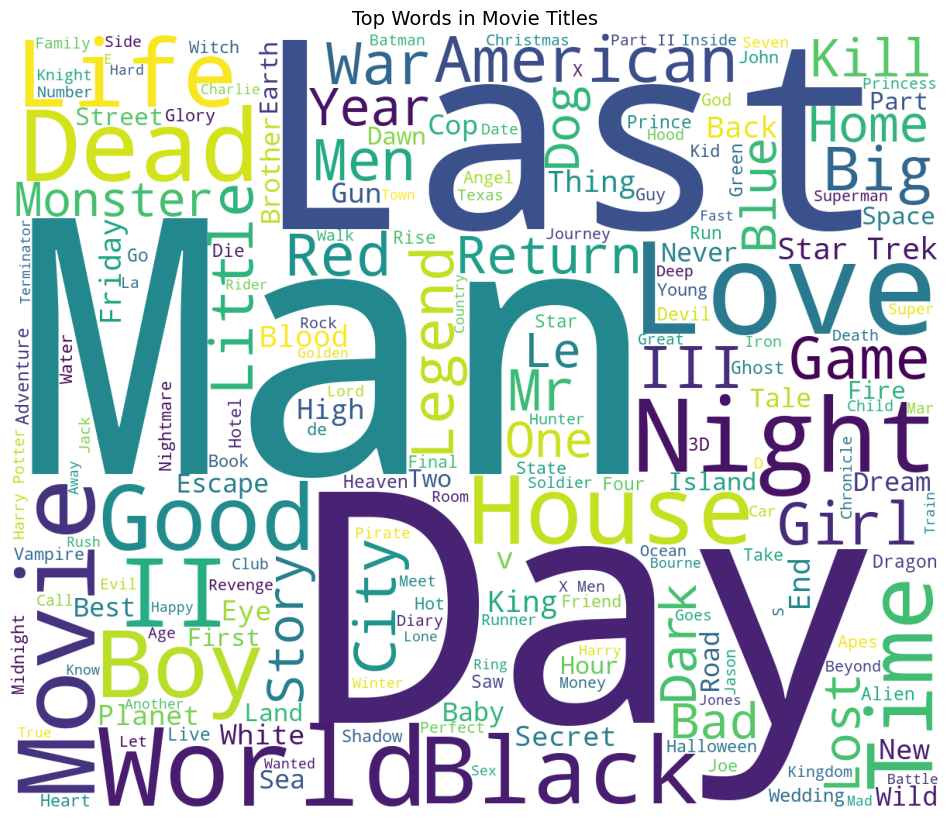

In [37]:
plt.figure(figsize = (12, 12))
text = ' '.join(data_explore['original_title'].values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top Words in Movie Titles', fontsize=14)
plt.axis("off")
plt.show()

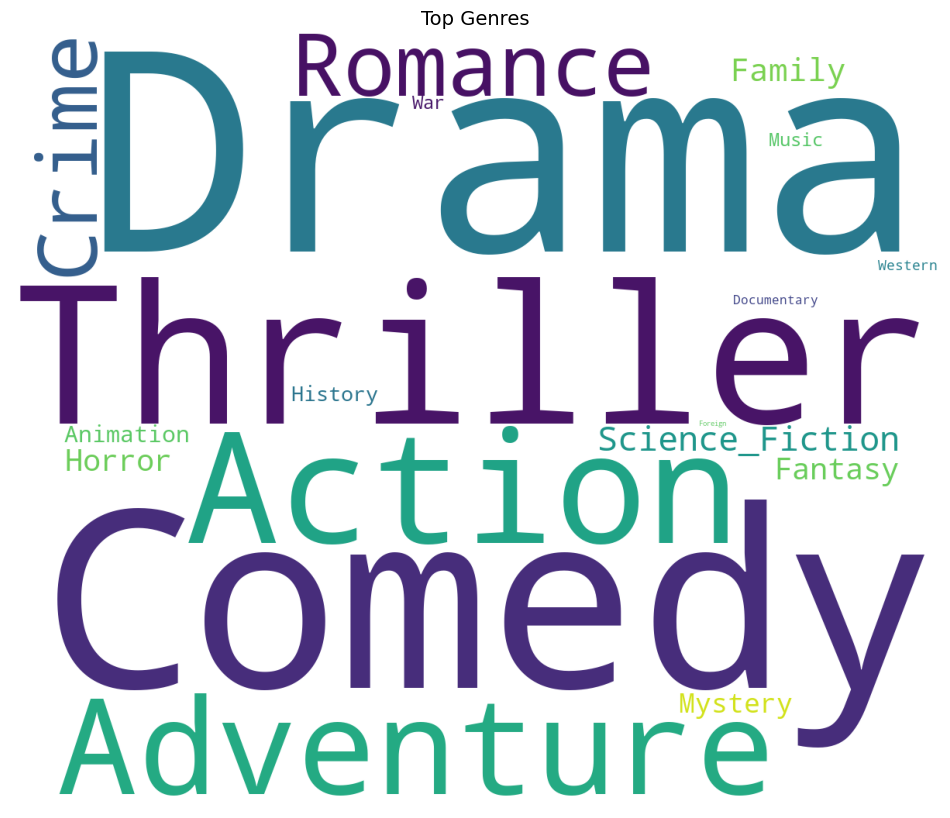

In [38]:
list_of_genres = list(data_explore['genres'].values)
plt.figure(figsize = (12, 12))
text = ' '.join(['_'.join(i.split(' ')) for j in list_of_genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False, width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top Genres', fontsize=14)
plt.axis("off")
plt.show()

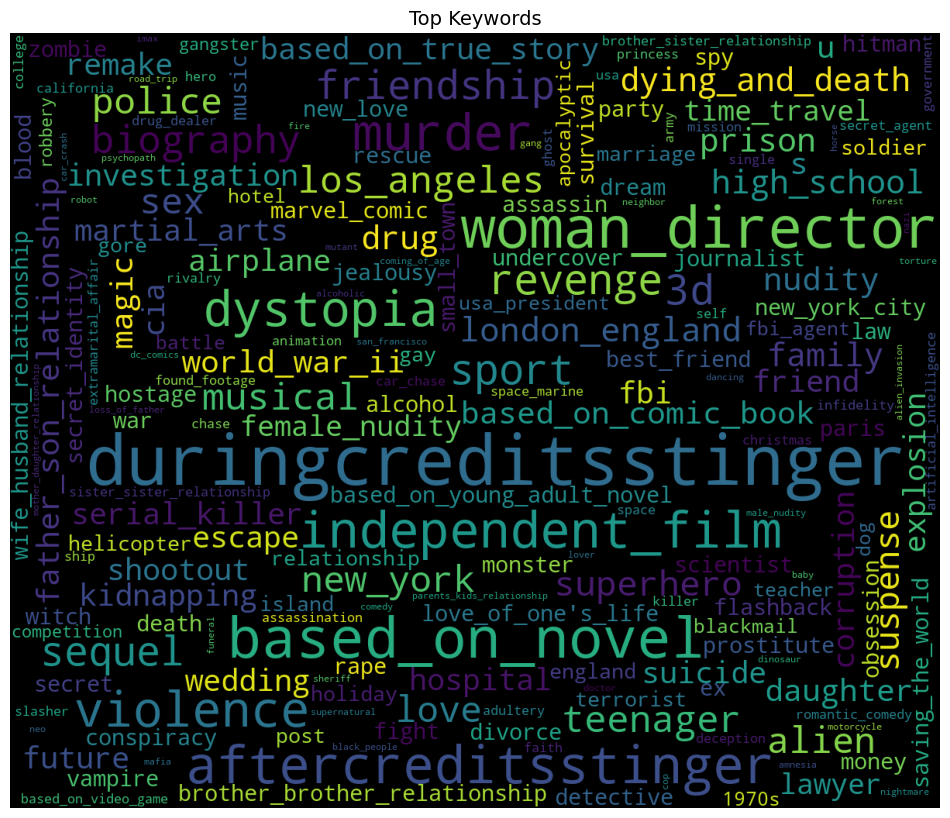

In [39]:
list_of_keywords = list(data_explore['keywords'].values)
plt.figure(figsize = (12, 12))
text = ' '.join(['_'.join(i.split(' ')) for j in list_of_keywords for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False, width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top Keywords', fontsize=14)
plt.axis("off")
plt.show()

### Revenue

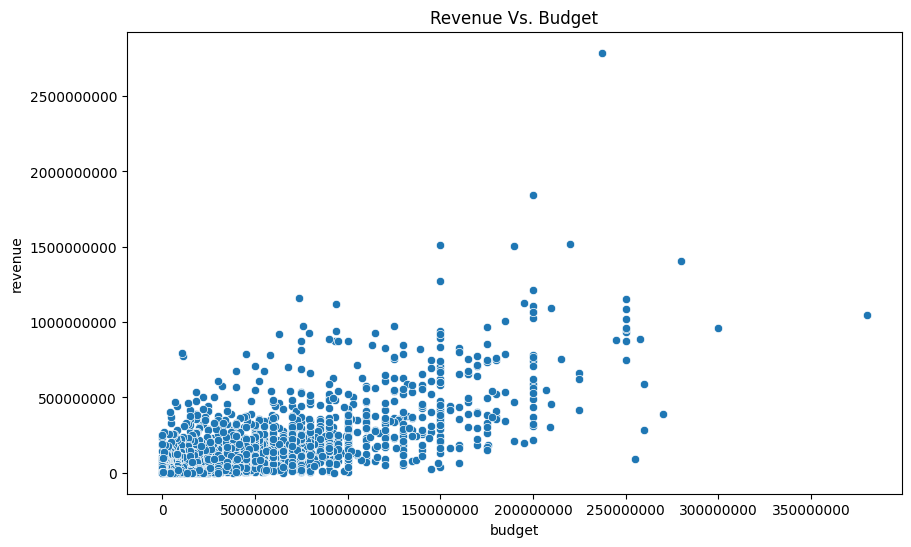

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=data_explore)
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Revenue Vs. Budget')
plt.show()

#### Observation:
   - There is not any clear trend between budget and revenue. But we can see that higher budget films generally earn more compare to small budget films.

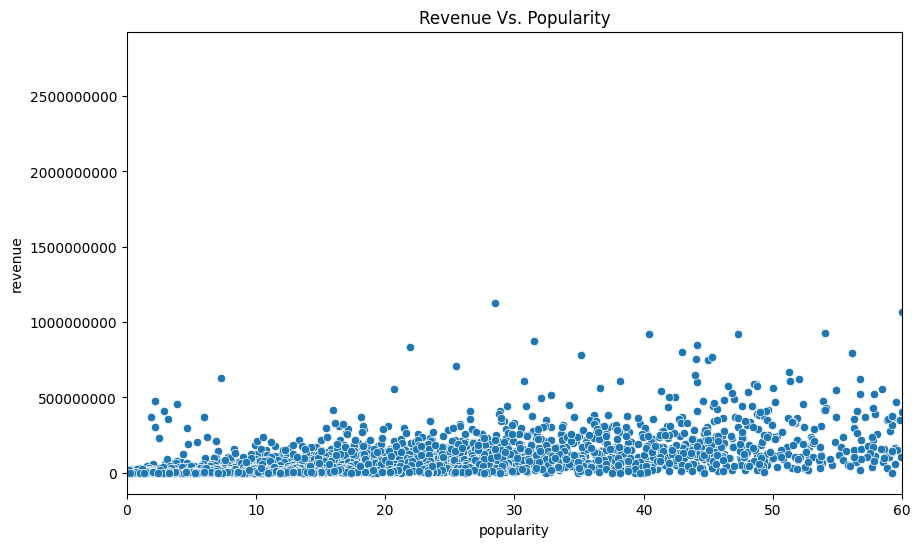

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='revenue', data=data_explore)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Revenue Vs. Popularity')
plt.xlim(0, 60)
plt.show()

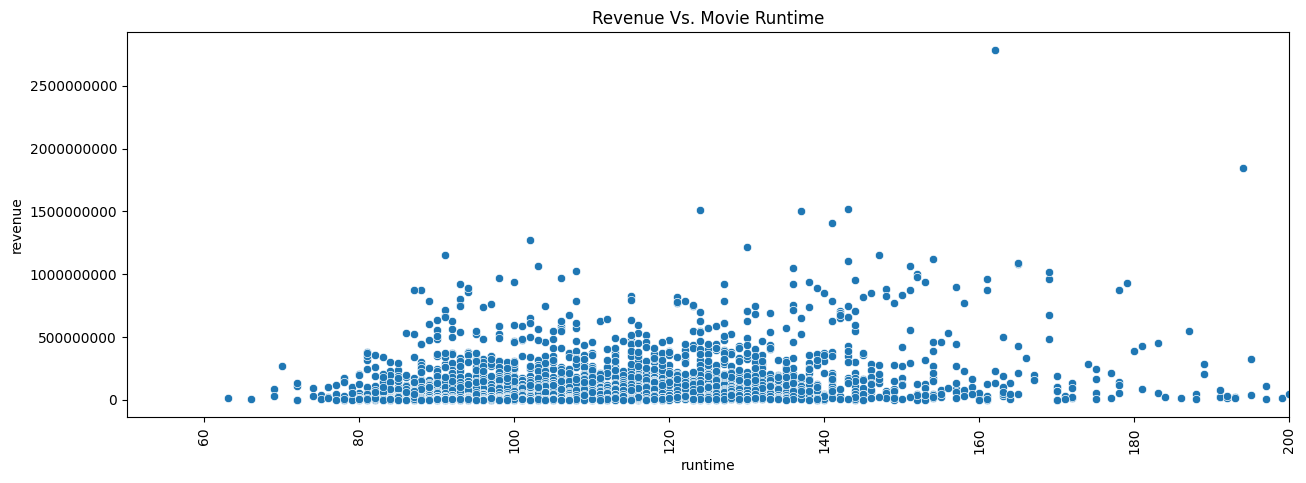

In [42]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='runtime', y='revenue', data=data_explore)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Revenue Vs. Movie Runtime')
plt.xlim(50, 200)
plt.show()

(31.5, 88.5)

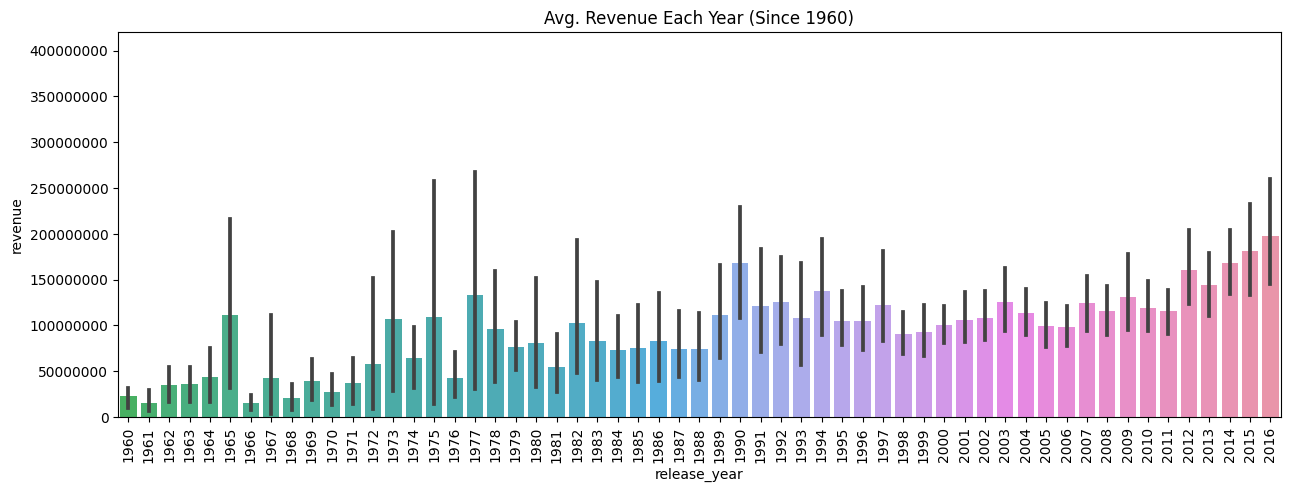

In [43]:
plt.figure(figsize=(15, 5))
sns.barplot(x='release_year', y='revenue', data=data_explore, estimator=np.mean)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Avg. Revenue Each Year (Since 1960)')
ax.set_xlim(left=31.5)

Text(0.5, 1.0, 'Avg. Revenue Each Month')

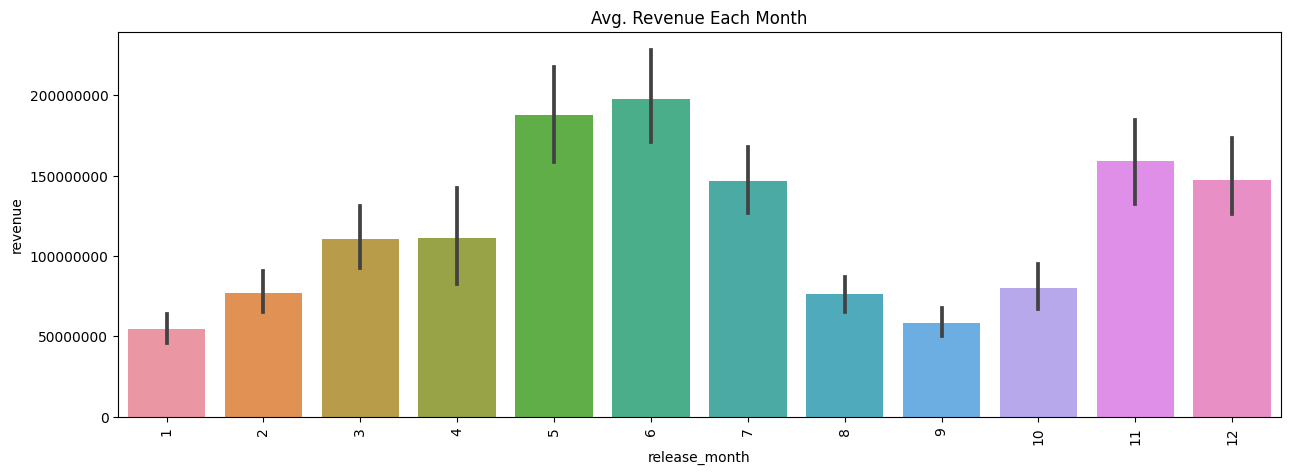

In [44]:
plt.figure(figsize=(15, 5))
sns.barplot(x='release_month', y='revenue', data=data_explore, estimator=np.mean)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Avg. Revenue Each Month')

Text(0.5, 1.0, 'Avg. Revenue on Each Day of Week')

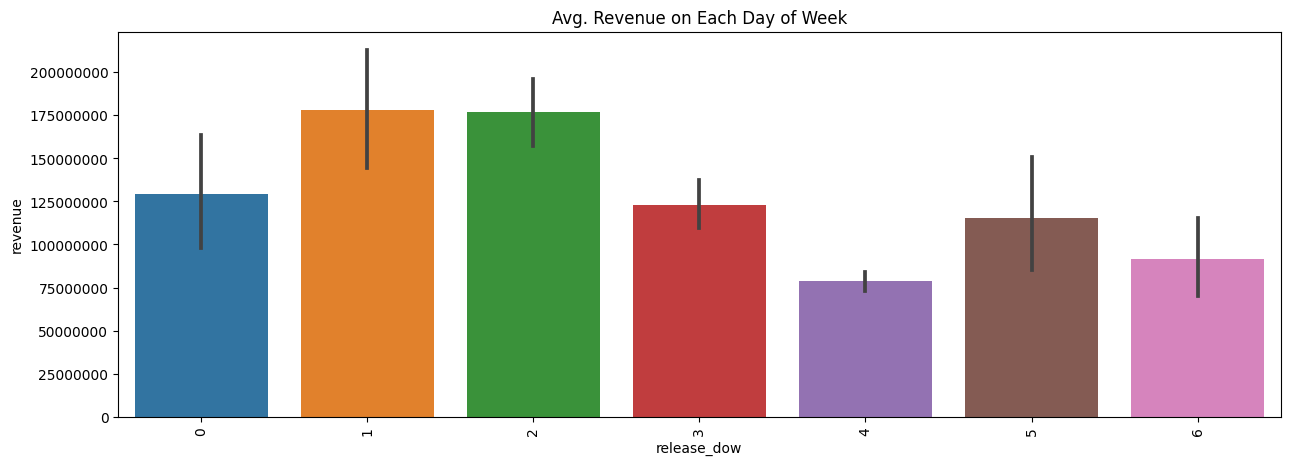

In [45]:
plt.figure(figsize=(15, 5))
sns.barplot(x='release_dow', y='revenue', data=data_explore, estimator=np.mean)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Avg. Revenue on Each Day of Week')

(-0.5, 15.5)

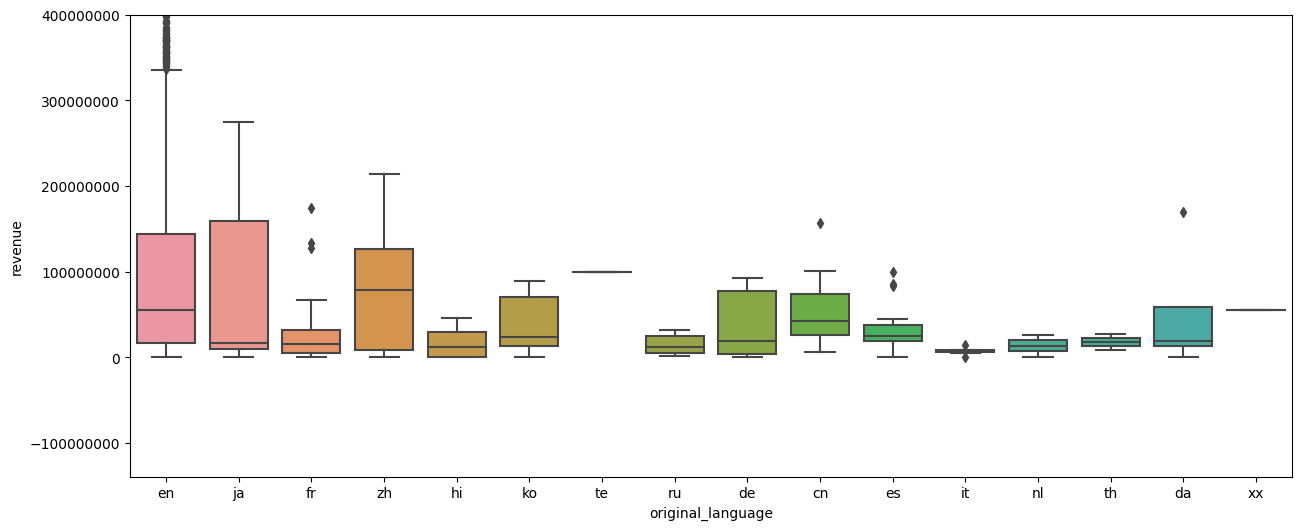

In [46]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='original_language', y='revenue', data=data_explore)
# plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_ylim(top=400000000)
ax.set_xlim(right=15.5)

In [47]:
def boxplot_sorted(df, by, column):
    df_boxplot = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df_boxplot.mean().sort_values(ascending=False)
    return df_boxplot[meds.index].boxplot()

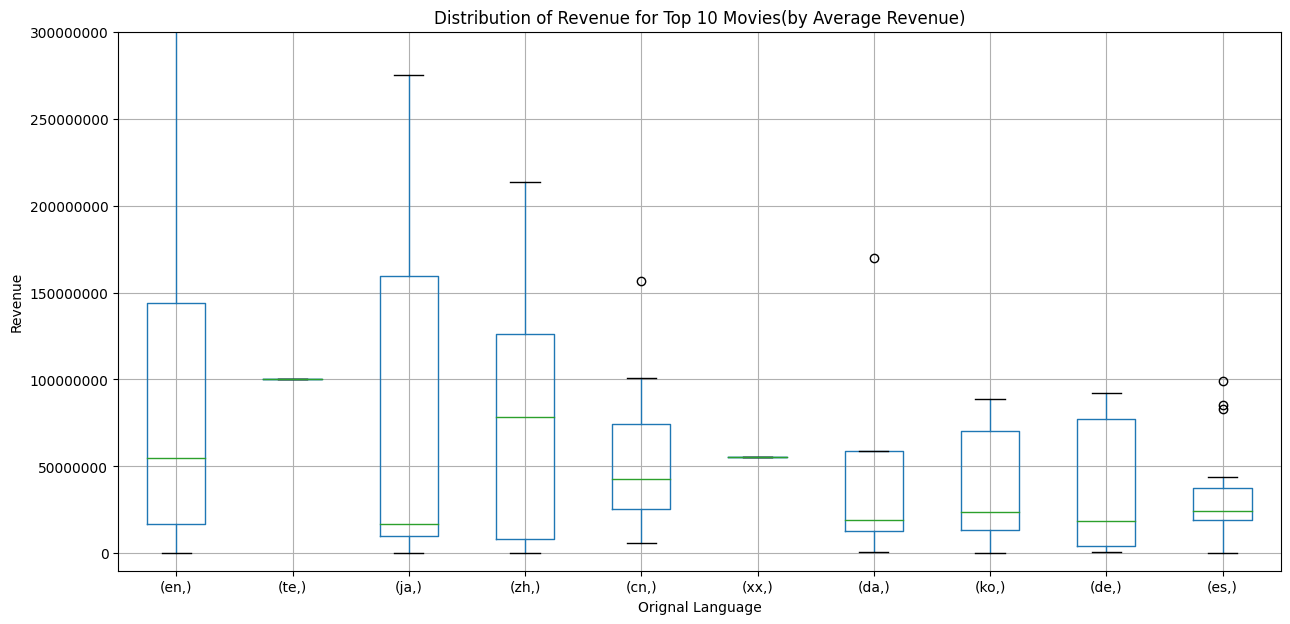

In [48]:
plt.figure(figsize=(15, 7))
axes = boxplot_sorted(data_explore, by = ['original_language'], column = 'revenue')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_ylim((-10000000, 300000000))
ax.set_xlim(right=10.5)
plt.xlabel('Orignal Language')
plt.ylabel('Revenue')
plt.title('Distribution of Revenue for Top 10 Movies(by Average Revenue)')
plt.show()

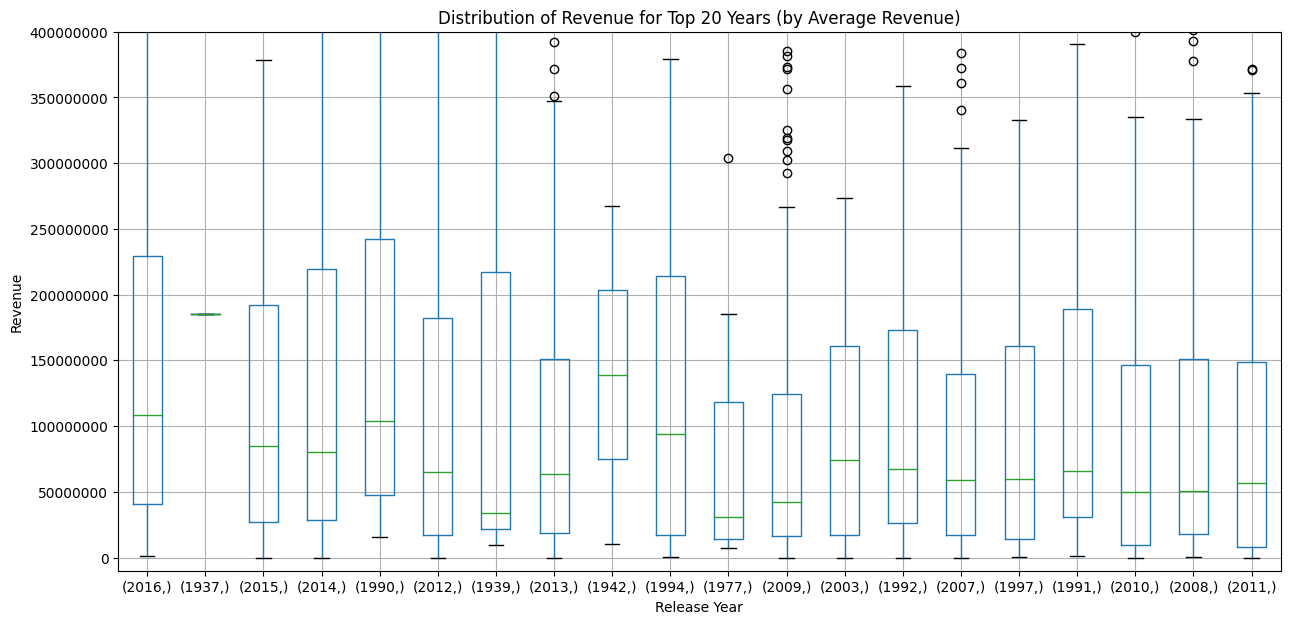

In [49]:
plt.figure(figsize=(15, 7))
axes = boxplot_sorted(data_explore, by = ['release_year'], column = 'revenue')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_ylim((-10000000, 400000000))
ax.set_xlim(right=20.5)
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.title('Distribution of Revenue for Top 20 Years (by Average Revenue)')
plt.show()

#### Correlation Plot

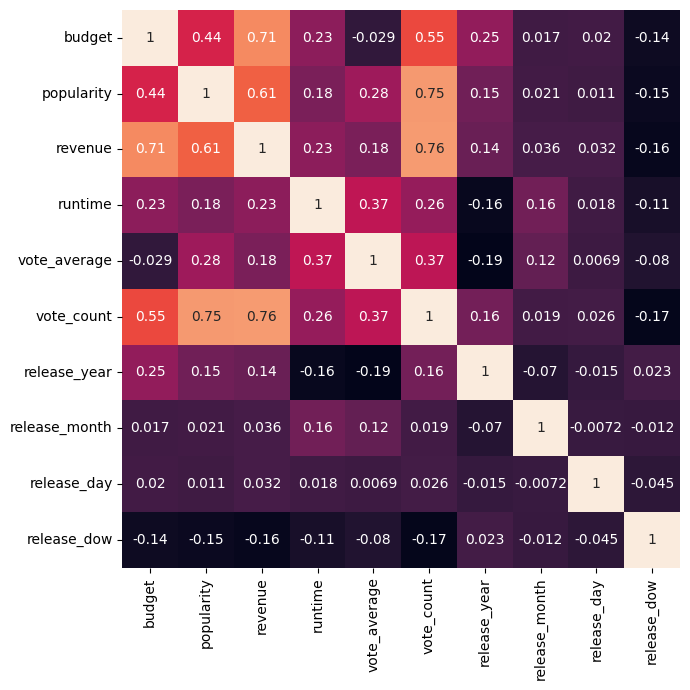

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns only
numeric_data = data_explore.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=bool), square=True, annot=True, cbar=False)

# Ensure the layout is clean
plt.tight_layout()
plt.show()
